Mielage prediction

In [ ]:
#Importing Libaries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
#Importing Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [ ]:
#Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
#Remove Missing Values

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [ ]:
#Data Visualization

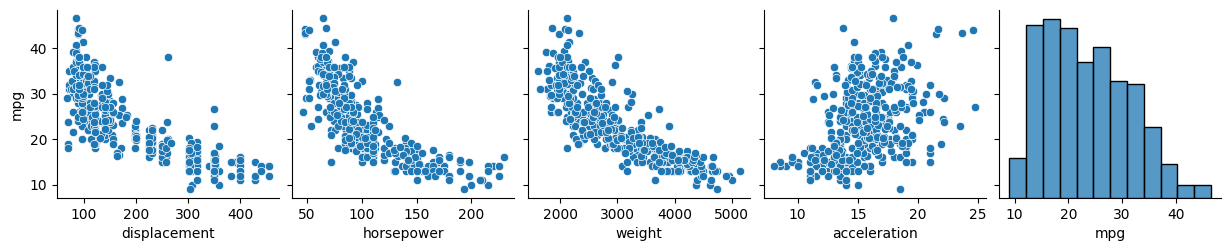

In [ ]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

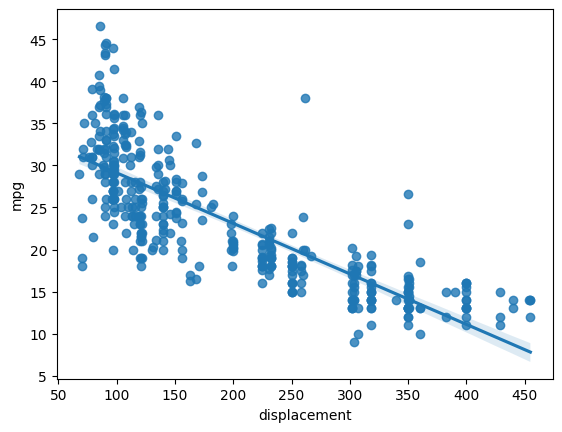

In [ ]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

In [ ]:
#Define Target Variable y and Feature X

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [ ]:
x.shape

(392, 4)

In [ ]:
#Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
x = ss.fit_transform(x)

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


In [ ]:
#Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

In [ ]:
#Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
lr.intercept_

23.591219250993962

In [ ]:
lr.coef_

array([-0.96256574, -1.49192976, -4.78534745, -0.28085606])

In [ ]:
#Predict Test Data

((10000, 11), (10000,))

In [ ]:
y_pred = lr.predict(xtest)

In [ ]:
y_pred

array([28.36586724, 10.10606176, 26.02487346, 20.82974212, 10.03080804,
       17.57065951, 23.55553463, 31.15173419, 19.46419091, 20.29623737,
       32.31264514, 21.89260451, 30.38257785, 32.73125369, 29.58526175,
       18.84875379, 22.01458291, 28.07229189, 25.11830721, 21.35146186,
       15.57276029, 22.74832561, 14.10573574,  8.70275291, 24.08061405,
       13.68771253, 30.65877606, 15.03404398, 23.37578847, 26.74964131,
       26.23896382, 28.17981487,  5.84427138, 28.21296421, 14.74693926,
       13.74874183, 28.20148535, 31.24918849, 32.62380283, 11.80824469,
       10.78685222, 24.33997668, 15.12915089, 18.57195963, 24.12444294,
       12.86976858, 31.6936429 , 23.31663884, 29.98029705, 17.3020786 ,
       22.61808523, 15.81773092, 29.06463683, 30.08458531, 16.46663064,
       14.63598787, 23.73040501, 33.02266406, 28.94268815, 24.54305572,
       29.32370589, 28.41329775,  9.53984587, 31.44945294, 28.01442911,
       18.769838  , 28.15291444, 30.10534285, 31.8118697 , 31.45

In [ ]:
#Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
mean_absolute_error(ytest, y_pred)

3.3963203415390706

In [ ]:
mean_absolute_percentage_error(ytest, y_pred)

0.1605594447961198

In [ ]:
r2_score(ytest, y_pred)

0.667640101223871

In [ ]:
#Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [ ]:
x_train2 = poly.fit_transform(xtrain)

In [ ]:
x_test2 = poly.fit_transform(xtest)

In [ ]:
lr.fit(x_train2, ytrain)

LinearRegression()

In [ ]:
lr.intercept_

21.178112754946806

In [ ]:
lr.coef_

array([-3.03118171, -5.32336703, -1.18870376, -1.14104747,  1.89533753,
        0.75228901, -0.68476323,  0.29465659, -0.10293769,  1.42958907])

In [ ]:
y_pred_poly = lr.predict(x_test2)

In [ ]:
#Model Accuracy

In [ ]:
mean_absolute_error(ytest, y_pred_poly)

2.936730441578906

In [ ]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.13071532467883015

In [ ]:
r2_score(ytest, y_pred_poly)

0.7051384731992261